# Assignment 7 - Numpy and Matplotlib
### Due Monday July 27

Your assignment should be handed in as an iPython/Jupyter notebook checked into your private GitHub repository `CMSC6950_Assignments` in a new folder named `assignment_7`. 

## 1 Plotting and analyzing ARGO float data

#### 1.1 Import numpy


In [1]:
import numpy as np

In [2]:
import wget


#### 1.2 Use the shell command `wget` to download an example ARGO float profile from the North Atlantic.
The data file's url is http://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz

In [52]:
file = wget.download('http://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz')

#### 1.3 Load the data file

In [53]:
npz = np.load(file)

#### 1.4 Extract the temperature, pressure and salinity arrays to arrays T, S, P and mask out invalid data (the nan values from missing points).

In [137]:
T = npz['T'][~np.isnan(npz['T'])]
S = npz['S'][~np.isnan(npz['S'])]
P = npz['P'][~np.isnan(npz['P'])]

In [138]:
npz.files

['S', 'T', 'levels', 'lon', 'date', 'P', 'lat']

#### 1.5 Extract the date, lat, lon, and levels arrays. 

In [139]:
date = npz['date']
lat = npz['lat']
lon = npz['lon']
levels = npz['levels']

#### 1.5 Note the shapes of T, S and P compared to these arrays. How do they line up?

In [140]:
print('T.shape', T.shape)
print('S.shape', S.shape)
print('P.shape', P.shape)
print('date.shape', date.shape)
print('lat.shape', lat.shape)
print('lon.shape', lon.shape)
print('levels.shape', levels.shape)

T.shape (5749,)
S.shape (5749,)
P.shape (5759,)
date.shape (75,)
lat.shape (75,)
lon.shape (75,)
levels.shape (78,)


#### 1.6 Load the necessary package for plotting using pyplot from matplotlib.

In [141]:
import matplotlib.pyplot as plt
import pandas as pd

#### 1.7 Make a 1 x 3 array of plots for each column of data in T, S and P. 
The vertical scale should be the `levels` data. Flip the veritcal axis direction so that levels increase downward on the plot. Each plot should have a line for each column of data. It will look messy.  Make sure you label the axes and put a title on each subplot.

In [142]:
# tarray = np.ndarray(LevelsT.reshape(1,3)
# T.sort()
# P.sort()
# S.sort()
tsp = np.array([[T,S,P]])
# tsp = np.column_stack((levels, tsp))
tsp.shape

(1, 3)

In [143]:
T.shape[0]
# tupes = [('Temperature',T),
#  ('Salinity', S),
#  ('Pressure', P)]
# ylab = 'Levels'

5749

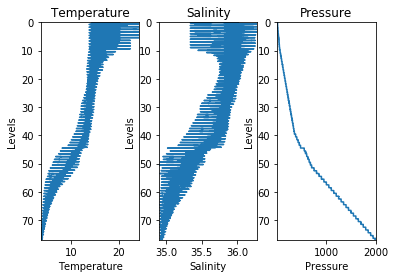

In [210]:
fig, row = plt.subplots(1,3)
headings = ['Temperature','Salinity','Pressure']
ylabel = 'Levels'
# row = a[0]
for i in range(3):
    data = tsp[0][i]
    levels_interpolated = np.arange(np.min(levels),np.max(levels), 1/(data.shape[0]/(np.max(levels)-np.min(levels))))
    row[i].plot(data,levels_interpolated)
    row[i].set_title(headings[i])
    row[i].set_xlabel(headings[i])
    row[i].set_ylabel(ylabel)
    row[i].axis([np.min(data),np.max(data),np.max(levels_interpolated),np.min(levels_interpolated)])
    
plt.show()

In [211]:
lis = [np.empty((0,0)),np.empty((0,0)),np.empty((0,0))]

#### 1.8 Compute the mean and standard deviation of each of T, S and P at each depth in `levels`.

In [222]:
mean_arrays=[np.empty((0,0)),np.empty((0,0)),np.empty((0,0))]
std_arrays=[np.empty((0,0)),np.empty((0,0)),np.empty((0,0))]
for i in range(3):
    data = tsp[0][i]
    levels_interpolated = np.arange(np.min(levels),np.max(levels), 1/(data.shape[0]/(np.max(levels)-np.min(levels))))
    stacked_data = np.column_stack((data, levels_interpolated))
    for j in levels:
        if j != np.max(levels):
            interval = stacked_data[(stacked_data[:,1]>j) & (stacked_data[:,1]<=j+1)]
            mean_arrays[i] = np.append(mean_arrays[i], np.mean(interval,axis=0)[0])
            std_arrays[i] = np.append(std_arrays[i], np.std(interval,axis=0)[0])
for i in range(3):
    print('means:', mean_arrays[i].shape)
    print('stds:', std_arrays[i].shape)

means: (77,)
stds: (77,)
means: (77,)
stds: (77,)
means: (77,)
stds: (77,)


#### 1.9 Now make a similar plot, but show only the mean T, S and P at each depth. Show error bars on each plot using the standard deviations. 
 Again, make sure you label the axes and put a title on each subplot.

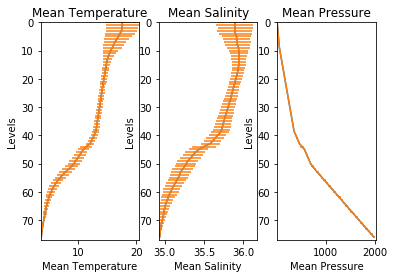

In [228]:
fig, row = plt.subplots(1,3)
mean_headings = ['Mean Temperature','Mean Salinity','Mean Pressure']
mean_ylabel = 'Levels'
for i in range(3):
    data = mean_arrays[i]
    std = std_arrays[i]
    row[i].plot(data,levels[0:77])
    row[i].errorbar(data, levels[0:77], xerr=std)#uplims=True, lolims=True,fmt='o')
    row[i].set_title(mean_headings[i])
    row[i].set_xlabel(mean_headings[i])
    row[i].set_ylabel(mean_ylabel)
    row[i].axis([np.min(data)-np.min(std),np.max(data)+np.max(std),np.max(levels),np.min(levels)])
    
plt.show()
# for tupl in tupes:
#     heading = tupl[0]
#     data = tupl[1].mean()
#     error_bar = tupl[1].std()
# #     plt.plot(data)
#     plt.errorbar(data,l, xerr=error_bar,uplims=True, lolims=True,fmt='o')
#     plt.title(heading)
#     plt.xlabel(heading + 'mean')
#     plt.ylabel(ylab)
#     plt.axis([np.min(tupl[1]),np.max(tupl[1]),np.max(levels),np.min(levels)])
#     plt.show()

#### 1.10  Compute the mean and standard deviation of each of T, S and P for each time in `date`.

In [250]:
# date_grouped = []#np.empty(npz.shape)
# for d in date:
#     filtered = npz['date'][npz['date']==d]
#     date_grouped.append(d, filtered['T'].mean(), filtered['S'].mean(), filtered['P'].mean(), filtered['T'].std(), filtered['S'].std(), filtered['P'].std())
# date_grouped
T_mean = T.mean(axis=0)
T_std = T.std(axis=0)

#### 1.11 Plot the mean T, S and P for each entry in *time*, now on a *3 x 1* subplot grid with time on the horizontal axis. Show error bars on each plot using the standard deviations.

In [257]:
plt.errorbar
mean_headings = ['Mean Temperature','Mean Salinity','Mean Pressure']
mean_ylabel = 'Levels'
for i in range(3):
    data = mean_arrays[i]
    std = std_arrays[i]
    row[i].plot(data,levels[0:77])
    row[i].errorbar(data, levels[0:77], xerr=std)#uplims=True, lolims=True,fmt='o')
    row[i].set_title(mean_headings[i])
    row[i].set_xlabel(mean_headings[i])
    row[i].set_ylabel(mean_ylabel)
    row[i].axis([np.min(data)-np.min(std),np.max(data)+np.max(std),np.max(levels),np.min(levels)])
    
plt.show()

#plt.errorbar(date, T.mean, xerr=std)

#### 1.12 Create a scatter plot of the positions of the ARGO float data.  Color the positions by the date. Add a grid overlay. 
Don't forget to label the axes!

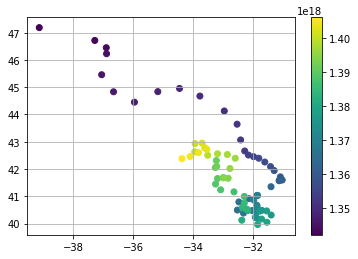

In [260]:
plt.scatter(lon, lat, c=date)
plt.grid()
plt.colorbar()

## 2 Matrix  multiplication
#### 2.1 Create a function called myMatrixMultiply that takes input matrices X and Y and computes their matrix product. 

*Matrix Multiplication.* In this exercise you will create two square matrices $A$ and $B$ with dimensions $n \times n$. You will then use [matrix multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication) to compute their product with the results being stored in matrix $C$. Thus, you will be computing the matrix equation $C = AB$. Note that matrix multiplication is different from element by element array multiplication. See the [wikipedia page](https://en.wikipedia.org/wiki/Matrix_multiplication) if you are unsure what matrix multiplication is.

Use three nested `for` loops to *explicitly* perform the matrix multiplication. The inner most loop calculates element `C[i,j]` which is equal to the sum of `A[i,k]*B[k,j]` over all values of index `k` from `0` to `n-1`. The two outer loops iterate over `i` and `j`.

In [236]:
def myMatrixMultiply(X, Y):
    n = len(X)
    C = np.zeros(shape=(n,n))
    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i][j] += X[i][k]*Y[k][j]
    return C

#### 2.2 Create ones() square matrices for A and B with n = 100. Use the `%timeit` function to compute the matrix product AB using your function `myMatrixMultiply`.

In [237]:
import timeit

In [259]:
A = np.full((100,100), 1)
B = np.full((100,100), 1)
setup = 'import numpy as np'
def callMatrixMultiply():
    return myMatrixMultiply(A, B)
print(timeit.timeit(setup=setup, stmt=callMatrixMultiply,number=10000)) ## time: 

KeyboardInterrupt: 

#### 2.3 Now let's see how much faster Numpy's built in matrix multiplication routine is. 
In Numpy, matrix multiplication is done using the `dot()` function. Use the `%timeit` function to compute the matrix product AB for n = 100 using `dot()` and time it using the `%timeit` function.

How much faster is using NumPy's `dot()` compared your `myMatrixMultiply` function? 

In [242]:
A = np.full((100,100), 1)
B = np.full((100,100), 1)
setup = 'import numpy as np'
def callNumpyDot():
    return np.dot(A, B)
print(timeit.timeit(setup=setup, stmt=callNumpyDot,number=10000)) ## time: 18.2392

18.23919474500144


Now time how long it takes for n = 1000

In [243]:
A = np.full((1000,1000), 1)
B = np.full((1000,1000), 1)
setup = 'import numpy as np'
def callNumpyDot():
    return np.dot(A, B)
print(timeit.timeit(setup=setup, stmt=callNumpyDot,number=10000))

KeyboardInterrupt: 